In [1]:
import pandas as pd
pd.set_option('display.max_row',1000)
pd.set_option('display.max_column',100)
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [2]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [3]:
drinks.spirit_servings=drinks.spirit_servings.astype(float)

In [4]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [5]:
drinks.groupby('continent').spirit_servings.agg(['mean','max','min'])

,mean,max,min
continent,,,
Africa,16.339623,152.0,0.0
Asia,60.840909,326.0,0.0
Europe,132.555556,373.0,0.0
North America,165.739130,438.0,68.0
Oceania,58.437500,254.0,0.0
South America,114.750000,302.0,25.0


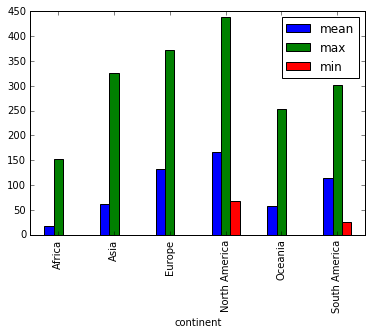

In [6]:
%matplotlib inline
drinks.groupby('continent').spirit_servings.agg(['mean','max','min']).plot(kind='bar')

### Exploring Pandas series

In [26]:
movies=pd.read_csv('http://bit.ly/imdbratings')

In [11]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [156]:
#sorting of the dataframe by some column
movies.sort_values(by=['title','content_rating']).head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [4]:
movies[movies.duration>=200]['genre'] # not so good way
movies.loc[movies.duration>=200,['genre','content_rating']]


,genre,content_rating
2,Crime,R
7,Adventure,PG-13
17,Drama,UNRATED
78,Crime,R
85,Adventure,PG
142,Adventure,PG
157,Drama,G
204,Adventure,G
445,Adventure,APPROVED
476,Drama,PG-13


In [5]:
#sorting a column of the movies dataframe(which is a series)
movies.title.sort_values(ascending=False).head()


864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [6]:
movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [57]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

movies.genre.describes()

In [59]:
movies.genre.nunique()
movies.columns
movies.genre.sort_index()

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
5          Drama
6        Western
7      Adventure
8      Biography
9          Drama
10     Adventure
11        Action
12        Action
13         Drama
14     Adventure
15     Adventure
16         Drama
17         Drama
18     Biography
19        Action
20        Action
21         Crime
22         Drama
23         Crime
24         Drama
25        Comedy
26       Western
27         Drama
28         Crime
29        Comedy
         ...    
949       Comedy
950        Crime
951        Drama
952       Comedy
953    Adventure
954       Action
955        Drama
956       Comedy
957       Comedy
958        Drama
959       Comedy
960       Comedy
961    Biography
962       Comedy
963       Action
964    Biography
965      Mystery
966    Animation
967       Action
968        Drama
969        Crime
970        Drama
971       Comedy
972        Drama
973        Drama
974       Comedy
975    Adventure
976       Acti

In [7]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [ ]:
pd.crosstab(movies.genre,movies.content_rating).head()

In [41]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [ ]:
movies.duration.plot(kind='box')

In [ ]:
movies.genre.value_counts().plot(kind='bar')

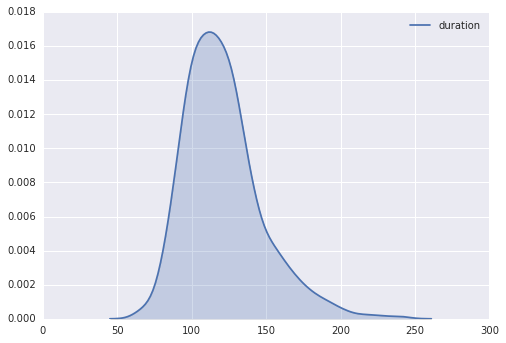

In [55]:

import seaborn as sns
sns.kdeplot(movies.duration, shade=True)

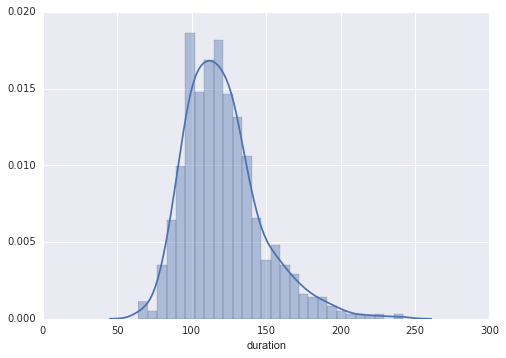

In [56]:
sns.distplot(movies.duration)

## How to missing data in pandas

In [27]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [58]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [59]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [10]:
ufo.isnull().sum()



City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [76]:
ufo.notnull().head().sum()

City               5
Colors Reported    0
Shape Reported     5
State              5
Time               5
dtype: int64

In [81]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [89]:
ufo.dropna().shape

(2486, 5)

In [29]:
chip=pd.read_table('http://bit.ly/chiporders')

In [15]:
chip.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [17]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [18]:
chip.item_price=chip.item_price.str.replace("$",'')

In [56]:
chip.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [75]:
def clean(x):
    if isinstance(x,str):
        a=x.replace('[','')
        a=a.replace(']','')
        return a
    else: pass
    
chip.choice_description.apply(clean)

0                                                    None
1                                              Clementine
2                                                   Apple
3                                                    None
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                    None
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                   None
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                   None
15                                                   None
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

In [30]:
mvuser=pd.read_table('http://bit.ly/movieusers')

In [77]:
mvuser.head()

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


In [78]:
mvuser=pd.read_table('http://bit.ly/movieusers',sep='|', header=None)

In [104]:
mvuser.head()

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [110]:
header_col=['user_id', 'age', 'gender','occupation','zip_code']
mvuser=pd.read_table('http://bit.ly/movieusers',sep='|', header=None,names=header_col)
mvuser.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [111]:
mvuser.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [116]:
mvuser=pd.read_table('http://bit.ly/movieusers',sep='|', header=None,names=header_col)
mvuser.shape

(20, 5)

0     24
1     53
2     23
3     24
4     33
5     42
6     57
7     36
8     29
9     53
10    39
11    28
12    47
13    45
14    49
15    21
16    30
17    35
18    40
19    42
Name: age, dtype: int64

In [133]:
cd C:\\Users\\senatoduro8\\Documents\\Notebooks_jupyter

C:\Users\senatoduro8\Documents\Notebooks_jupyter


In [134]:
pwd

'C:\\Users\\senatoduro8\\Documents\\Notebooks_jupyter'

In [141]:
data=pd.read_csv('Z:\\largetransfer\\luc\\carter\\data\\model_data\\tci_final_model.csv')

C:\Users\senatoduro8\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
data.shape

(113132, 47)

In [143]:
del data

In [14]:
dat=range(34,41)
index1=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
s1=pd.Series(dat,index=index1)
s1

Mon     34
Tue     35
Wed     36
Thur    37
Fri     38
Sat     39
Sun     40
dtype: int32

In [22]:
s1.index.name='Weekday'
s2=pd.Series(dict(zip(index1,dat)))
s2.sort_values()

Mon     34
Tue     35
Wed     36
Thur    37
Fri     38
Sat     39
Sun     40
dtype: int64

In [23]:
s1*2

Weekday
Mon     68
Tue     70
Wed     72
Thur    74
Fri     76
Sat     78
Sun     80
dtype: int32

In [24]:
s1['Mon':'Wed']

Weekday
Mon    34
Tue    35
Wed    36
dtype: int32

In [25]:
s1[1:4]

Weekday
Tue     35
Wed     36
Thur    37
dtype: int32

In [26]:
for i,v in enumerate(s1):
    print(i,v)

0 34
1 35
2 36
3 37
4 38
5 39
6 40


In [27]:
[x**4  for x in s1]

[1336336, 1500625, 1679616, 1874161, 2085136, 2313441, 2560000]

In [29]:
for k,v in s1.iteritems():
    print(k,v)

Mon 34
Tue 35
Wed 36
Thur 37
Fri 38
Sat 39
Sun 40


In [30]:
pd.date_range('20160605',periods=7)

DatetimeIndex(['2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11'],
              dtype='datetime64[ns]', freq='D')

In [34]:
movies.star_rating.value_counts().head()

7.6    124
7.8    116
7.7    113
7.5    108
8.1    103
Name: star_rating, dtype: int64

In [42]:
movies.sort_index(ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."


In [45]:
for k,g in movies.groupby('genre'):
    print(k, g.head(2))
    

Action     star_rating            title content_rating   genre  duration  \
3           9.0  The Dark Knight          PG-13  Action       152   
11          8.8        Inception          PG-13  Action       148   

                                          actors_list  
3   [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
11  [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...  
Adventure     star_rating                                              title  \
7           8.9      The Lord of the Rings: The Return of the King   
10          8.8  The Lord of the Rings: The Fellowship of the Ring   

   content_rating      genre  duration  \
7           PG-13  Adventure       201   
10          PG-13  Adventure       178   

                                          actors_list  
7   [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...  
10  [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...  
Animation     star_rating          title content_rating      genre  duration  \
30          8.6  Spir

In [47]:
movies.head(4)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [57]:
movies[1:2]

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


#### Slicing

In [58]:
movies.ix[[1,4,5],:]

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [61]:
movies.ix[:,['title','actors_list']].head(2)

,title,actors_list
0,The Shawshank Redemption,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,The Godfather,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [62]:
pd.set_option('display.max_rows',10)

In [68]:
movies.ix[1:2,:]

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [69]:
movies[1:3]

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [70]:
grouped=movies.groupby('genre')

In [71]:
[k  for k,g in grouped]

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Western']

In [73]:
grouped.get_group('Action').head()


,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."


In [76]:
grouped.describe()


star_rating    duration
genre                                 
Action  count   136.000000  136.000000
        mean      7.884559  126.485294
        std       0.333084   21.982480
        min       7.400000   80.000000
        25%       7.600000  111.000000
...                    ...         ...
Western min       7.600000   85.000000
        25%       8.100000  131.000000
        50%       8.300000  135.000000
        75%       8.500000  161.000000
        max       8.900000  175.000000

[128 rows x 2 columns]

In [28]:
drinks.set_index(drinks.country,inplace=True)

In [3]:
drinks.spirit_servings=drinks.spirit_servings.apply(float)

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0.0,0,0.0,Asia
1,Albania,89,132.0,54,4.9,Europe
2,Algeria,25,0.0,14,0.7,Africa
3,Andorra,245,138.0,312,12.4,Europe
4,Angola,217,57.0,45,5.9,Africa


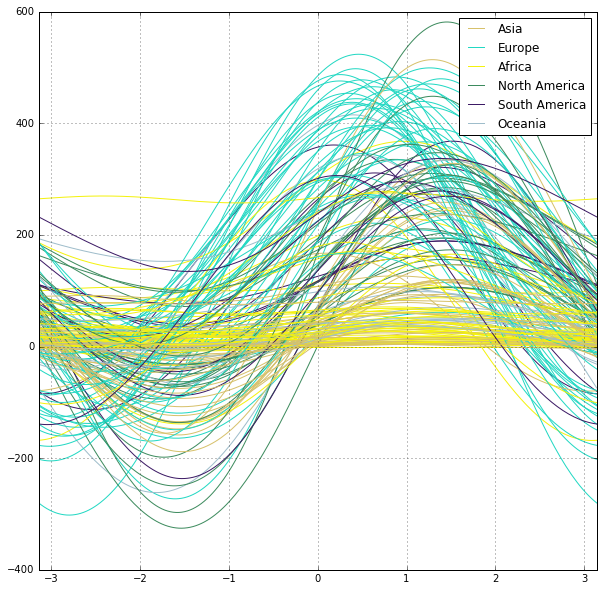

In [244]:
#      processing ufo data


# ufo.columns=ufo.columns.str.replace(' ','')

# ufo.ColorsReported[ufo.ColorsReported.isnull()]=ufo.ColorsReported[ufo.ColorsReported.notnull()].mode()[0]

# ColorsReported=pd.get_dummies(ufo.ColorsReported).astype(int)

# ufo_new=ufo.join(ColorsReported, how='left')

# ufo_State=pd.get_dummies(ufo_new.State).astype(int)

# ufo_new.join(ufo_State,how='left')

# ufo_new.City.nunique()
plt.figure(figsize=[10,10])
drinks.head()
col=drinks.columns[1:-1]
# drinks[col].boxplot()

# ax=pd.tools.plotting.scatter_matrix(drinks[col],diagonal='kde')

pd.tools.plotting.andrews_curves(drinks.iloc[list(range(drinks.shape[0])),1:],'continent')



# ax.set_axis_bgcolor('white')

# ax.xticks(rotation=45)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000251DF1AF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000251DEC9E48>]], dtype=object)

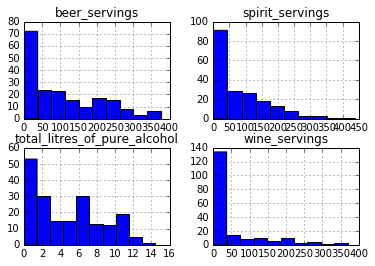

In [247]:
drinks[col].hist()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

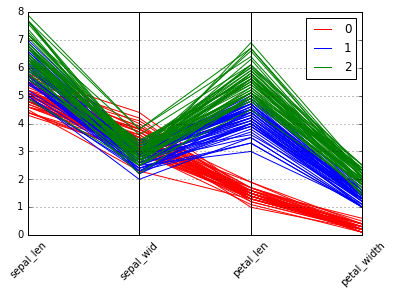

In [248]:
iris=load_iris()
import matplotlib.pyplot as plt
X=iris.data
y=iris.target
x_names=['sepal_len','sepal_wid','petal_len',"petal_width"]
data_frame=pd.DataFrame(X)
data_frame=data_frame.rename(columns=dict(zip(list(range(4)),x_names)))
col=pd.DataFrame({'iris_type':y})
data_frame=data_frame.join(col,how='left')

# PARALLEL COORDINATES PLOT
%matplotlib inline
ax = pd.tools.plotting.parallel_coordinates(data_frame,'iris_type', color=['red','blue','green'])
ax.set_axis_bgcolor('white') 
plt.xticks(rotation=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002518166358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000002518DFF6D8>]], dtype=object)

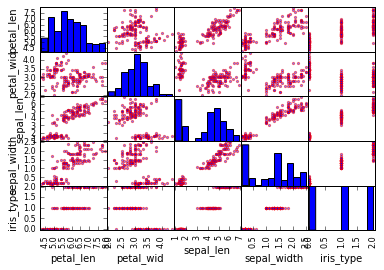

In [202]:
plt.figure(figsize=(10,10))
pd.scatter_matrix(data_frame,diagonal='hist',color='red')

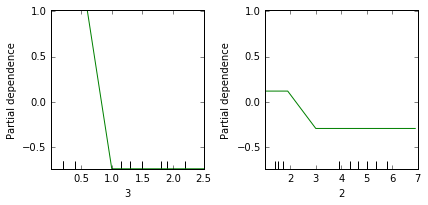

In [22]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
max_depth=1).fit(iris.data, iris.target)
features = [3, 2]
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=0) 

Automatically created module for IPython interactive environment
MSE: 6.5628


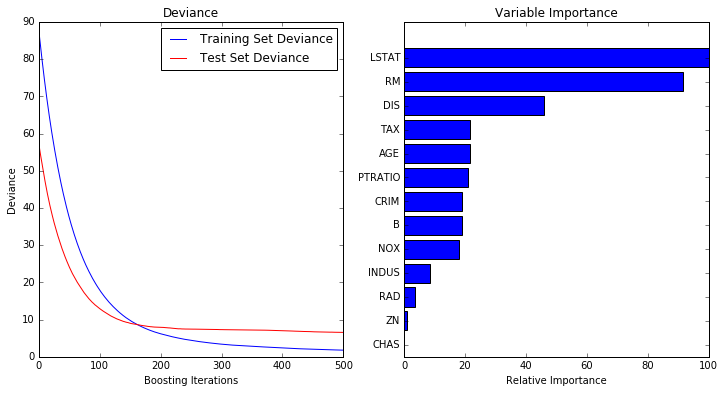

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

###############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

###############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [32]:
raw_data = {'patient': [1, 1, 1, 2, 2],
        'obs': [1, 2, 3, 1, 2],
        'treatment': [0, 1, 0, 1, 0],
        'score': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(raw_data, columns = ['patient', 'obs', 'treatment', 'score'])
# def codex(x):
#     if x.strip()=='strong':
#         return 1
#     elif x.strip()=='weak':
#         return 2
#     else:
#         return 3
# df['score']=df.score.apply(codex)
 
#Alternatively
df.score=df.score.map({'strong':1,'weak':2,'normal':3})
df

,patient,obs,treatment,score
0,1,1,0,1
1,1,2,1,2
2,1,3,0,3
3,2,1,1,2
4,2,2,0,1


In [ ]:
from itertools import chain
dit = {'county': ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'fireReports': [4, 24, 31, 2, 3]}
key=dit.keys()
vals=[dit[x] for x in key]
print(key)
print(vals)

In [30]:
# Create a list containing three lists of names
l = [['Amy','Betty','Cathryn','Dana'], 
                 ['Elizabeth','Fay','Gora'], 
                  ['Heidi','Jane','Kayley']]

list(chain(l[0],l[1],l[2]))

['Amy',
 'Betty',
 'Cathryn',
 'Dana',
 'Elizabeth',
 'Fay',
 'Gora',
 'Heidi',
 'Jane',
 'Kayley']

In [3]:
import numpy as np
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore'])
df['elderly']=np.where(df.age>=50,"yes","no")
df

,name,age,preTestScore,postTestScore,elderly
0,Jason,42,4,25,no
1,Molly,52,24,94,yes
2,Tina,36,31,57,no
3,Jake,24,2,62,no
4,Amy,73,3,70,yes


In [17]:
# create a dataset
raw_data = {'score': [1,2,3], 
        'tags': [['apple','pear','guava'],['truck','car','plane'],['cat','dog','mouse']]}
df = pd.DataFrame(raw_data, columns = ['score', 'tags'])

# view the dataset
tags=df.tags.apply(pd.Series)
df=df.join(tags,how='left')
df=df.T
df.index=['score','tag','tag_0','tag_1','tag_2']
df.T

,score,tag,tag_0,tag_1,tag_2
0,1,"[apple, pear, guava]",apple,pear,guava
1,2,"[truck, car, plane]",truck,car,plane
2,3,"[cat, dog, mouse]",cat,dog,mouse


In [25]:
import datetime
date=datetime.datetime(2011,2,2)
date+ pd.DateOffset(months=5,days=5,hours=5)

Timestamp('2011-07-07 05:00:00')

In [36]:
#Binning an attribute in a dataframe

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])

bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']

df['categories']=pd.cut(df.postTestScore,bins,labels=group_names)
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


In [9]:
#Cleaning the dataa
incoming_reports = ["We are attacking on their left flank but are losing many men.", 
               "We cannot see the enemy army. Nothing else to report.", 
               "We are ready to attack but are waiting for your orders."]

In [ ]:
ls=[x.strip().split() for x in incoming_reports]
from itertools import chain
a=list(chain(ls[0],ls[1],ls[2]))

In [32]:
df = pd.DataFrame()

df['german_army'] = np.random.randint(low=20000, high=30000, size=100)
df['allied_army'] = np.random.randint(low=20000, high=40000, size=100)
df.index = pd.date_range('1/1/2014', periods=100, freq='H')

df.head()

,german_army,allied_army
2014-01-01 00:00:00,23235,21586
2014-01-01 01:00:00,23275,39954
2014-01-01 02:00:00,23228,34494
2014-01-01 03:00:00,24395,34799
2014-01-01 04:00:00,28507,29815


In [52]:
#Slicing based on the index: A datetime string
df=df.ix['2014/01/02':'2014/03/1',]
df.index= df.index + pd.DateOffset(days=5,hours=4)
df.head()

,german_army,allied_army
2014-01-22 16:00:00,20737,20660
2014-01-22 17:00:00,28402,27277
2014-01-22 18:00:00,28371,29626
2014-01-22 19:00:00,22151,30517
2014-01-22 20:00:00,29734,33545


In [56]:
df.shift(periods=2).head()

,german_army,allied_army
2014-01-22 16:00:00,NaN,NaN
2014-01-22 17:00:00,NaN,NaN
2014-01-22 18:00:00,20737.0,20660.0
2014-01-22 19:00:00,28402.0,27277.0
2014-01-22 20:00:00,28371.0,29626.0


In [68]:
df=drinks.set_index(['country','continent'])
df=df.swaplevel('continent','country')
df.mean(level='continent')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [86]:
#   Selecting a subset from
# drinks[:2]. #or drinks.iloc[:2,]


raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])


#Create a second dataframe

raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])


raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])



In [129]:
df_new=pd.concat([df_a,df_b])

pd.merge(df_new,df_n,on='subject_id',how='inner')

pd.merge(df_a,df_b,left_on='subject_id',right_on='subject_id',how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [134]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df['next_yr']=df.year+1


In [193]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [170]:
# df.preTestScore[df.preTestScore.isnull()]=df.preTestScore[df.preTestScore.notnull()].mean()
# df.ix[df.preTestScore.isnull(),'preTestScore']=df.ix[df.preTestScore.notnull(),'preTestScore'].mean()

df['preTestScore'].fillna(df.groupby('sex')['preTestScore'].transform('mean'),inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [214]:
import re
def Dates(x):
    reg=r'\d{4}-\d{2}-\d{2}'
    regex=re.compile(reg)
    if regex.search(x)==None:
        return np.nan
    else: return regex.search(x).group()
    
def States(x):
    reg=r'[A-Za-z]+'
    regex=re.compile(reg)
    if regex.search(x)==None:
        return np.nan
    else: return regex.search(x).group()
def nums(x):
    reg=r'\d+\.\d*'
    regex=re.compile(reg)
    if regex.search(x)==None:
        return np.nan
    else: return regex.search(x).group()

In [199]:
# Create a dataframe with a single column of strings
data = {'raw': ['Arizona 1 2014-12-23       3242.0',
                'Iowa 1 2010-02-23       3453.7',
                'Oregon 0 2014-06-20       2123.0',
                'Maryland 0 2014-03-14       1123.6',
                'Florida 1 2013-01-15       2134.0',
                'Georgia 0 2012-07-14       2345.6']}
df = pd.DataFrame(data, columns = ['raw'])
df

,raw
0,Arizona 1 2014-12-23 3242.0
1,Iowa 1 2010-02-23 3453.7
2,Oregon 0 2014-06-20 2123.0
3,Maryland 0 2014-03-14 1123.6
4,Florida 1 2013-01-15 2134.0
5,Georgia 0 2012-07-14 2345.6


In [ ]:
df['new_raw']=df.raw.apply(Dates)
df['State']=df.raw.apply(States)
df['nums']=df.raw.apply(nums)


df.raw.str.contains(r'\d{4}-\d{2}-\d{2}')
df.raw.str.extract(r'(\d{4}-\d{2}-\d{2})',expand=True)


raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [-999, -999, -999, 2, 1],
        'postTestScore': [2, 2, -999, 2, -999]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df.replace(-999,np.nan,inplace=True)


In [247]:
df.take(np.random.permutation(df.shape[0]))[:2]

,first_name,last_name,age,preTestScore,postTestScore
3,Jake,Milner,24,2,2
0,Jason,Miller,42,-999,2


In [248]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'], 
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
print(df)

                         date  battle_deaths
0  2014-05-01 18:47:05.069722             34
1  2014-05-01 18:47:05.119994             25
2  2014-05-02 18:47:05.178768             26
3  2014-05-02 18:47:05.230071             15
4  2014-05-02 18:47:05.230071             15
5  2014-05-02 18:47:05.280592             14
6  2014-05-03 18:47:05.332662             26
7  2014-05-03 18:47:05.385109             25
8  2014-05-04 18:47:05.436523             62
9  2014-05-04 18:47:05.486877             41


In [266]:
# df.date=pd.to_datetime(df.date)
# df.set_index('date',inplace=True)
df['2014-05']

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [29]:
# Encoding categorical variable using DictVectorizer
import numpy as np
col=drinks.columns.values
col=[x for x in col]
df=drinks.drop(col[1:5],axis=1)
df=df.T.to_dict().values()

In [32]:
# from sklearn.feature_extraction import DictVectorizer
# d=DictVectorizer(sparse=False)
# d.fit_transform(df)